In [33]:
import os
from pathlib import Path

path = Path('titanic')
if not path.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [34]:
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [35]:
df = pd.read_csv(path/'train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [36]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
modes = df.mode().iloc[0]

In [38]:
df.fillna(modes, inplace=True)

In [39]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot: >

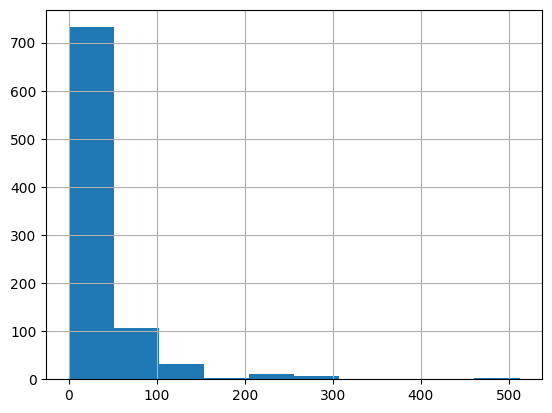

In [40]:
df['Fare'].hist()

In [41]:
df['LogFare']=np.log(df['Fare']+1)

<AxesSubplot: >

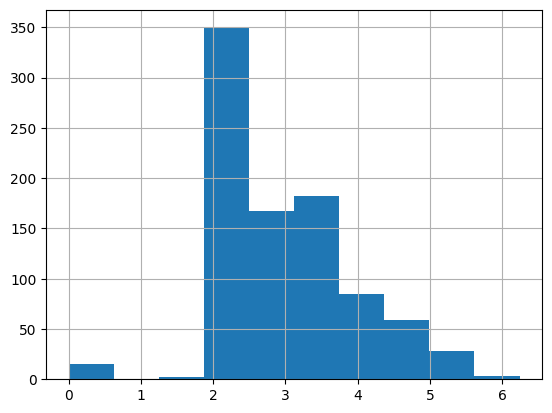

In [42]:
df['LogFare'].hist()

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,LogFare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


In [44]:
df.describe(exclude=(np.number))

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [45]:
pc = sorted(df.Pclass.unique())
pc

[1, 2, 3]

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LogFare'], dtype='object')

In [47]:
df = pd.get_dummies(df, columns=["Sex","Pclass","Embarked"])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [48]:
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [49]:
from torch import tensor

In [50]:
t_y = tensor(df.Survived)

In [52]:
x_cols = ['Age','SibSp','Parch', 'LogFare'] + added_cols
t_x = tensor(df[x_cols].values, dtype=torch.float)

In [53]:
t_x.shape

torch.Size([891, 12])

In [54]:
t_y.shape

torch.Size([891])

In [55]:
torch.manual_seed(0)

In [58]:
n_coeff = t_x.shape[1]
coeffs = torch.rand(n_coeff) - 0.5

In [59]:
t_x*coeffs

tensor([[ 9.7855,  0.1314,  0.0000, -0.4520,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [16.9023,  0.1314,  0.0000, -0.9169,  0.0000, -0.4432, -0.0317,  0.0000,  0.0000,  0.4184,  0.0000,  0.0000],
        [11.5647,  0.0000,  0.0000, -0.4688,  0.0000, -0.4432, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [15.5679,  0.1314,  0.0000, -0.8548,  0.0000, -0.4432, -0.0317,  0.0000,  0.0000,  0.0000,  0.0000,  0.4549],
        [15.5679,  0.0000,  0.0000, -0.4718,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [10.6751,  0.0000,  0.0000, -0.4813,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.4913,  0.0000],
        [24.0190,  0.0000,  0.0000, -0.8499,  0.2305, -0.0000, -0.0317,  0.0000,  0.0000,  0.0000,  0.0000,  0.4549],
        ...,
        [11.1199,  0.0000,  0.0000, -0.4467,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [17.3471,  0.0000,  1.7589, -0.7294

In [60]:
t_x.shape

torch.Size([891, 12])

In [61]:
coeffs.shape

torch.Size([12])

In [65]:
vals, ixs = t_x.max(dim=0)

In [66]:
t_x = t_x / vals

In [67]:
t_x * coeffs

tensor([[ 0.1223,  0.0164,  0.0000, -0.0724,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [ 0.2113,  0.0164,  0.0000, -0.1469,  0.0000, -0.4432, -0.0317,  0.0000,  0.0000,  0.4184,  0.0000,  0.0000],
        [ 0.1446,  0.0000,  0.0000, -0.0751,  0.0000, -0.4432, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [ 0.1946,  0.0164,  0.0000, -0.1370,  0.0000, -0.4432, -0.0317,  0.0000,  0.0000,  0.0000,  0.0000,  0.4549],
        [ 0.1946,  0.0000,  0.0000, -0.0756,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [ 0.1334,  0.0000,  0.0000, -0.0771,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.4913,  0.0000],
        [ 0.3002,  0.0000,  0.0000, -0.1362,  0.2305, -0.0000, -0.0317,  0.0000,  0.0000,  0.0000,  0.0000,  0.4549],
        ...,
        [ 0.1390,  0.0000,  0.0000, -0.0716,  0.2305, -0.0000, -0.0000,  0.0000,  0.1499,  0.0000,  0.0000,  0.4549],
        [ 0.2168,  0.0000,  0.2931, -0.1169

In [68]:
(t_x * coeffs).shape

torch.Size([891, 12])

In [71]:
z = torch.zeros(2,2)
z[1][0]=2
z

tensor([[0., 0.],
        [2., 0.]])

In [76]:
a = torch.FloatTensor(np.diag(np.arange(1,4)))
b = torch.FloatTensor(np.diag(np.arange(1,4)))
a

tensor([[1., 0., 0.],
        [0., 2., 0.],
        [0., 0., 3.]])

In [80]:
c=torch.FloatTensor(np.arange(1,4))
c

tensor([1., 2., 3.])

In [81]:
c.shape

torch.Size([3])

In [79]:
a*c

tensor([[1., 0., 0.],
        [0., 4., 0.],
        [0., 0., 9.]])

In [93]:
a = torch.randn(5,3)
a

tensor([[-1.7643, -0.6106, -0.6245],
        [-0.9806, -0.9336, -0.6725],
        [ 0.8126,  0.3725, -0.5488],
        [-0.3822,  1.8868, -0.5876],
        [-0.2883, -0.1951,  0.5681]])

In [99]:
b = torch.FloatTensor(np.diag([1,2,1]))
b

tensor([[1., 0., 0.],
        [0., 2., 0.],
        [0., 0., 1.]])

In [101]:
a @ b

tensor([[-1.7643, -1.2212, -0.6245],
        [-0.9806, -1.8672, -0.6725],
        [ 0.8126,  0.7449, -0.5488],
        [-0.3822,  3.7736, -0.5876],
        [-0.2883, -0.3903,  0.5681]])

In [109]:
z = torch.zeros(2,3,4)
o = torch.ones(1)
z + o

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

## Matmul

In [131]:
x = torch.FloatTensor(np.arange(1.,3**3+1).reshape(-1,3)) 
# -1 means "figure this one out"
x

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.],
        [19., 20., 21.],
        [22., 23., 24.],
        [25., 26., 27.]])

In [132]:
x.sum(axis=0)

tensor([117., 126., 135.])

In [133]:
x.sum(axis=1)

tensor([ 6., 15., 24., 33., 42., 51., 60., 69., 78.])

In [136]:
x = x.reshape(-1,3,3)
x

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]],

        [[19., 20., 21.],
         [22., 23., 24.],
         [25., 26., 27.]]])

In [137]:
x.sum(0)

tensor([[30., 33., 36.],
        [39., 42., 45.],
        [48., 51., 54.]])

In [138]:
x.sum(1)

tensor([[12., 15., 18.],
        [39., 42., 45.],
        [66., 69., 72.]])

In [139]:
x.sum(2)

tensor([[ 6., 15., 24.],
        [33., 42., 51.],
        [60., 69., 78.]])

In [140]:
t_x.shape

torch.Size([891, 12])

In [141]:
coeffs.shape

torch.Size([12])

In [149]:
(t_x * coeffs).sum(axis=1)

tensor([     0.9017,      0.0242,      0.2310,      0.0539,      0.9543,      0.9281,      0.8177,      0.8482,      0.3433,      0.1183,
             0.1603,      0.1886,      0.8709,      1.2425,      0.1646,      0.3870,      0.8904,      0.8950,      0.2493,      0.1862,
             0.9336,      0.9506,      0.2059,      0.6859,      0.2078,      0.5631,      0.8600,      0.7344,      0.2565,      0.8938,
             0.7243,     -0.0781,      0.2570,      1.1353,      0.6375,      0.7673,      0.8600,      0.8765,      0.1935,      0.1334,
             0.3198,      0.2389,      0.8573,      0.1636,      0.2287,      0.8932,      0.9254,      0.2570,      0.8580,      0.1774,
             0.8714,      0.8775,      0.0829,      0.2430,      0.8950,      0.6636,      0.2113,      0.8850,      0.2246,      0.9631,
             0.8488,      0.0403,      0.7680,      0.9087,      0.6354,      0.9117,      0.2558,      0.8650,      0.3639,      0.9349,
             0.9463,      0.3171, 

In [150]:
torch.matmul(t_x,coeffs)

tensor([     0.9017,      0.0242,      0.2310,      0.0539,      0.9543,      0.9281,      0.8177,      0.8482,      0.3433,      0.1183,
             0.1603,      0.1886,      0.8709,      1.2425,      0.1646,      0.3870,      0.8904,      0.8950,      0.2493,      0.1862,
             0.9336,      0.9506,      0.2059,      0.6859,      0.2078,      0.5631,      0.8600,      0.7344,      0.2565,      0.8938,
             0.7243,     -0.0781,      0.2570,      1.1353,      0.6375,      0.7673,      0.8600,      0.8765,      0.1935,      0.1334,
             0.3198,      0.2389,      0.8573,      0.1636,      0.2287,      0.8932,      0.9254,      0.2570,      0.8580,      0.1774,
             0.8714,      0.8775,      0.0829,      0.2430,      0.8950,      0.6636,      0.2113,      0.8850,      0.2246,      0.9631,
             0.8488,      0.0403,      0.7680,      0.9087,      0.6354,      0.9117,      0.2558,      0.8650,      0.3639,      0.9349,
             0.9463,      0.3171, 

In [152]:
assert torch.matmul(t_x,coeffs).shape == (t_x*coeffs).sum(1).shape

In [155]:
preds = t_x@coeffs

In [157]:
loss = torch.abs(preds - t_y).mean()
loss

tensor(0.7381)

In [162]:
# coeffs : [rows, features]
# inds : [features]
def get_preds(coeffs, inds):
    return inds@coeffs
def get_loss(coeffs, inds, deps):
    return torch.abs(get_preds(coeffs, inds) - deps).mean()

In [159]:
coeffs.requires_grad_() # _ is inplace

tensor([ 0.4448,  0.1314,  0.3518, -0.2142,  0.2305, -0.4432, -0.0317,  0.1668,  0.1499,  0.4184,  0.4913,  0.4549], requires_grad=True)

In [163]:
loss = get_loss(coeffs, t_x, t_y)
loss

tensor(0.7381, grad_fn=<MeanBackward0>)

In [184]:
# how grad works
x = torch.FloatTensor([1])
x.requires_grad_()

y = (x**2 + 3*x + 2)
y.backward()
x.grad

# 2x+3 at x=1 = 5

tensor([5.])

In [186]:
y

tensor([6.], grad_fn=<AddBackward0>)

In [195]:
def train(coeffs, inds, deps):
    iter = 0
    while iter < 100:
        loss = get_loss(coeffs, inds, deps)
        loss.backward()
        with torch.no_grad(): 
            coeffs.sub_(0.1 * coeffs.grad)
            coeffs.grad.zero_()
            if iter % 10 == 0: 
                print(loss)
        iter += 1   
train(coeffs, t_x, t_y)

tensor(0.2483, grad_fn=<MeanBackward0>)
tensor(0.2664, grad_fn=<MeanBackward0>)
tensor(0.2538, grad_fn=<MeanBackward0>)
tensor(0.2696, grad_fn=<MeanBackward0>)
tensor(0.2481, grad_fn=<MeanBackward0>)
tensor(0.2659, grad_fn=<MeanBackward0>)
tensor(0.2417, grad_fn=<MeanBackward0>)
tensor(0.2638, grad_fn=<MeanBackward0>)
tensor(0.2503, grad_fn=<MeanBackward0>)
tensor(0.2605, grad_fn=<MeanBackward0>)
